In [1]:
from loader import loadData
import pandas as pd
import matplotlib.pyplot as plt



Load the data

In [2]:
df = loadData()

Look at the data


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/27/2019 8:38,165.0,4/29/2019 6:05,365.0,163609.0,2.082019e+14,3.366698e+10,3.534681e+13,D79778B,...,14987796.0,9056232.0,11879031.0,8247208.0,646678453.0,5294081.0,29320108.0,7867767.0,31649432.0,681136616.0
1,1.311448e+19,4/27/2019 8:38,184.0,4/29/2019 7:51,42.0,169956.0,2.082014e+14,3.366162e+10,3.588751e+13,D35261C,...,16348390.0,4716006.0,20879619.0,8670219.0,41805775.0,1733531.0,767159375.0,11877019.0,29307586.0,91044064.0
2,7.349883e+18,4/27/2019 8:38,443.0,4/29/2019 7:55,87.0,170187.0,2.082018e+14,3.366615e+10,3.518231e+13,D12017B,...,4371849.0,10485982.0,4242648.0,13132694.0,488443332.0,14964346.0,735107614.0,11559224.0,54204245.0,509736116.0
3,7.349883e+18,4/27/2019 8:38,63.0,4/29/2019 6:22,553.0,164647.0,2.082019e+14,3.365187e+10,3.515581e+13,T92850B,...,542034.0,2946621.0,8604505.0,2076726.0,295088361.0,9673956.0,577955398.0,7029664.0,25964041.0,317321966.0
4,1.311448e+19,4/27/2019 8:38,662.0,4/29/2019 8:43,450.0,173071.0,2.082099e+14,3.365034e+10,3.561461e+13,T42176B,...,5369265.0,5154582.0,9731597.0,12046172.0,312475530.0,9758044.0,752013569.0,10664634.0,40315466.0,343566590.0


TASK 2 USER OVERVIEW ANALYSIS   

Top 10 Handsets

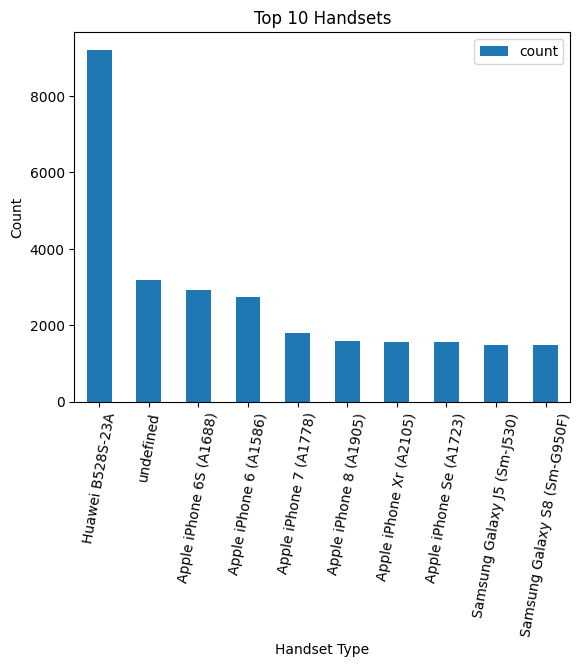

In [4]:

value_counts = df['Handset Type'].value_counts()[:10]
top_10_handsets = value_counts.index.tolist()
#print(value_counts)
#print(top_10_handsets)

top_10_df = pd.DataFrame(value_counts)
top_10_df.plot(kind= 'bar',rot=80)
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Top 10 Handsets')
plt.show(10)





The top 3 handset manufacturers

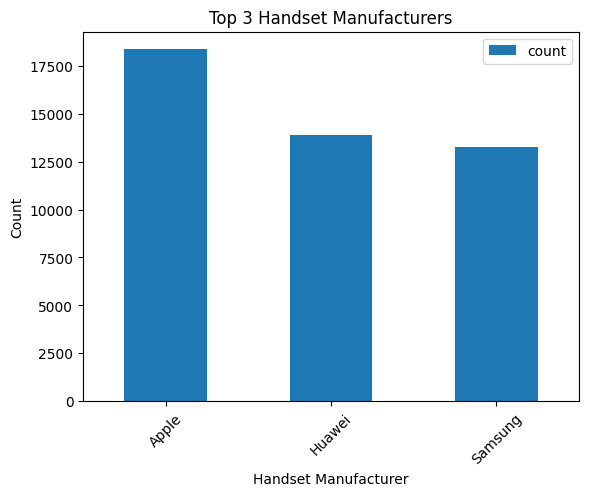

In [5]:
value_counts = df['Handset Manufacturer'].value_counts()[:3]
top_3_manufacturers = value_counts.index.tolist()

top_3_df = pd.DataFrame(value_counts)
top_3_df.plot(kind='bar', rot=45)

plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.title('Top 3 Handset Manufacturers')
plt.show()


Top 5 handsets per top 3 manufacturer

Handset Type
Apple iPhone 6S (A1688)    2911
Apple iPhone 6 (A1586)     2745
Apple iPhone 7 (A1778)     1798
Apple iPhone 8 (A1905)     1581
Apple iPhone Xr (A2105)    1573
Name: count, dtype: int64


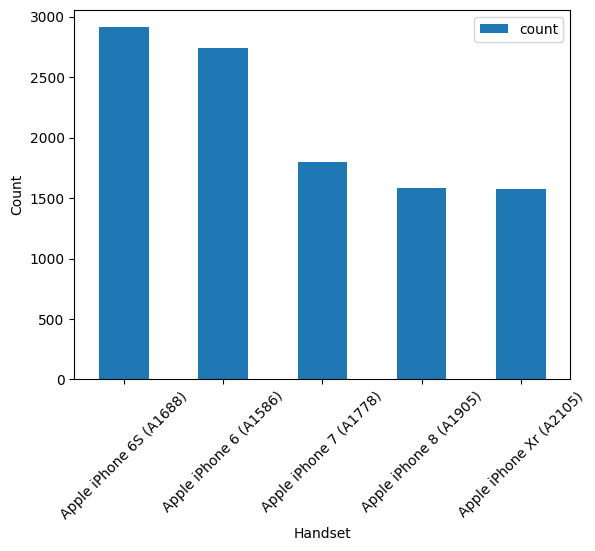

Handset Type
Huawei B528S-23A                  9215
Huawei E5180                       856
Huawei P20 Lite Huawei Nova 3E     652
Huawei P20                         500
Huawei P20 Pro                     335
Name: count, dtype: int64


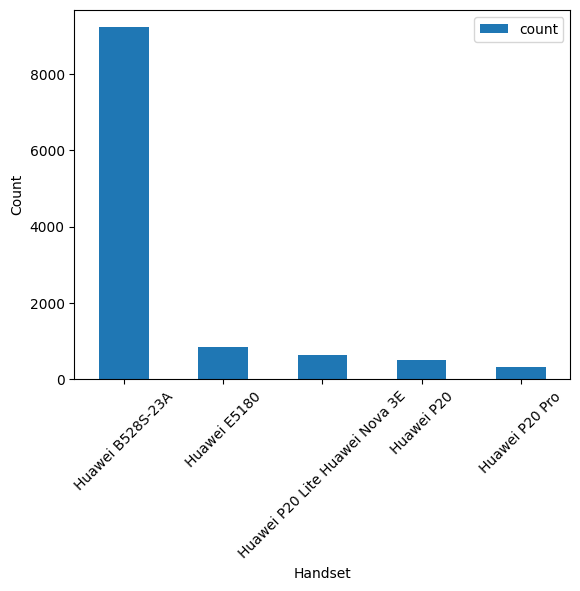

Handset Type
Samsung Galaxy J5 (Sm-J530)     1487
Samsung Galaxy S8 (Sm-G950F)    1478
Samsung Galaxy A5 Sm-A520F      1206
Samsung Galaxy J3 (Sm-J330)     1179
Samsung Galaxy S7 (Sm-G930X)     995
Name: count, dtype: int64


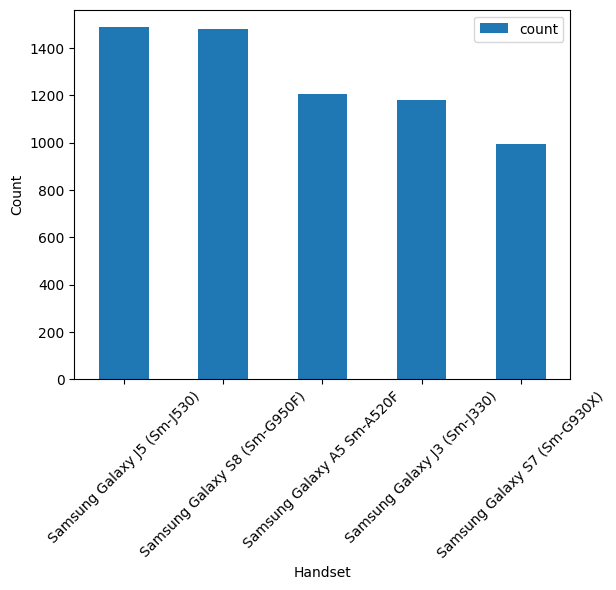

['Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)', 'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)', 'Huawei B528S-23A', 'Huawei E5180', 'Huawei P20 Lite Huawei Nova 3E', 'Huawei P20', 'Huawei P20 Pro', 'Samsung Galaxy J5 (Sm-J530)', 'Samsung Galaxy S8 (Sm-G950F)', 'Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J3 (Sm-J330)', 'Samsung Galaxy S7 (Sm-G930X)']


In [6]:
top_5_handsets = []
all_top_handsets = []
for manufacturer in top_3_manufacturers:
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    handset_counts = manufacturer_df['Handset Type'].value_counts()[:5]
    all_top_handsets.append(handset_counts)
    top_5_handsets.extend(handset_counts.index.tolist())
for top_handsets in all_top_handsets:
    print(top_handsets)
    top_handsets_df = pd.DataFrame(top_handsets)
    top_handsets_df.plot(kind='bar', rot=45)
    plt.xlabel('Handset')
    plt.ylabel('Count')
    plt.title('')
    plt.show()
    
print(top_5_handsets)



Number of xdr sessions

In [7]:

xdr_sessions_aggregate = df.groupby("MSISDN/Number").agg({"Google DL (Bytes)": "count", 
                                                            "Google UL (Bytes)":"count",
                                                            "Email DL (Bytes)": "count",
                                                            "Email UL (Bytes)": "count",
                                                            "Youtube DL (Bytes)": "count",
                                                            "Youtube UL (Bytes)": "count",
                                                            "Netflix DL (Bytes)": "count",
                                                            "Netflix UL (Bytes)": "count",
                                                            "Gaming DL (Bytes)": "count",
                                                            "Gaming UL (Bytes)": "count",
                                                            "Other DL (Bytes)": "count",
                                                            "Other UL (Bytes)": "count",
                                                            })

xdr_sessions_aggregate.head()


,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,
3.360100e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360100e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360101e+10,2,2,2,2,2,2,2,2,2,2,2,2
3.360101e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360103e+10,2,2,2,2,2,2,2,2,2,2,2,2


Session duration

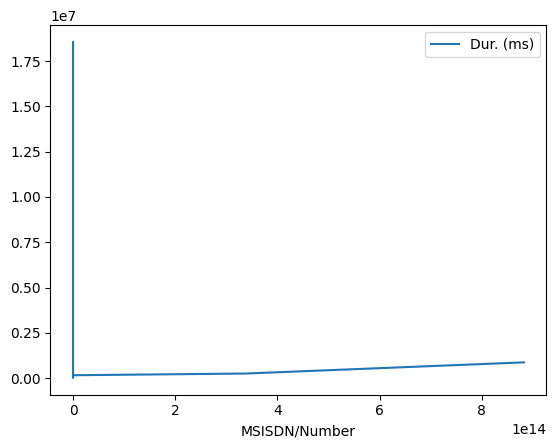

In [8]:
df.columns
xdr_sessions_duration = df.groupby("MSISDN/Number").agg({"Dur. (ms)":"sum"})
xdr_sessions_duration.head()
xdr_sessions_duration.plot()
plt.show()

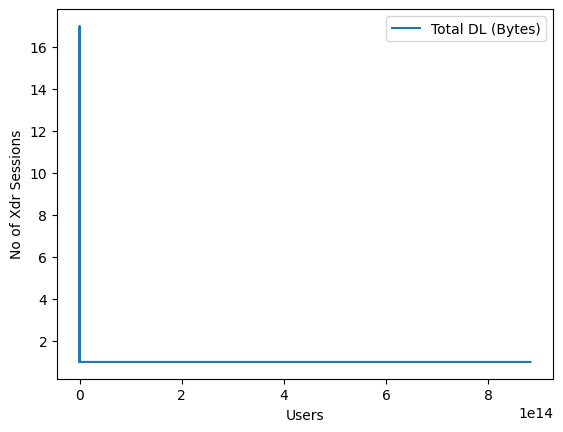

In [9]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "count"})
aggregated_data.head(10)
aggregated_data.plot()
plt.ylabel("No of Xdr Sessions")
plt.xlabel("Users")
plt.show()


Total DL per user

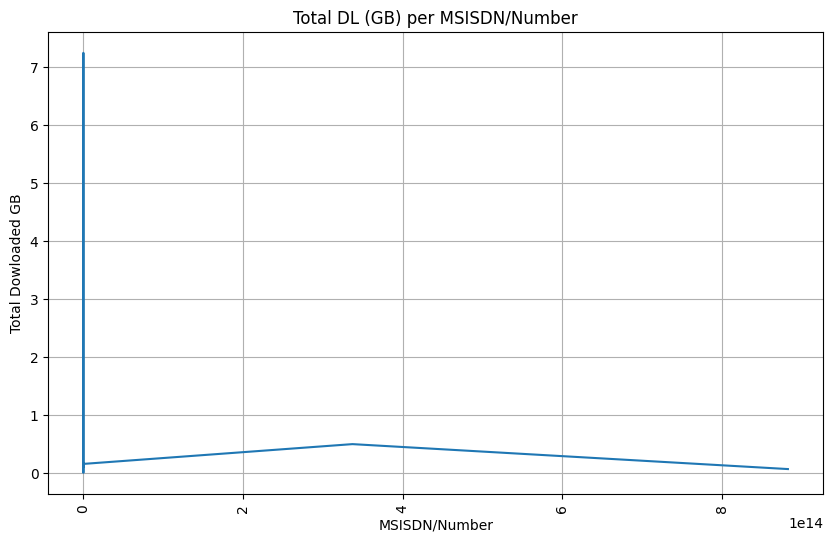

In [10]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "sum"})
aggregated_data['Total DL (GB)'] = aggregated_data['Total DL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total DL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Dowloaded GB')
plt.title('Total DL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Total UL per user

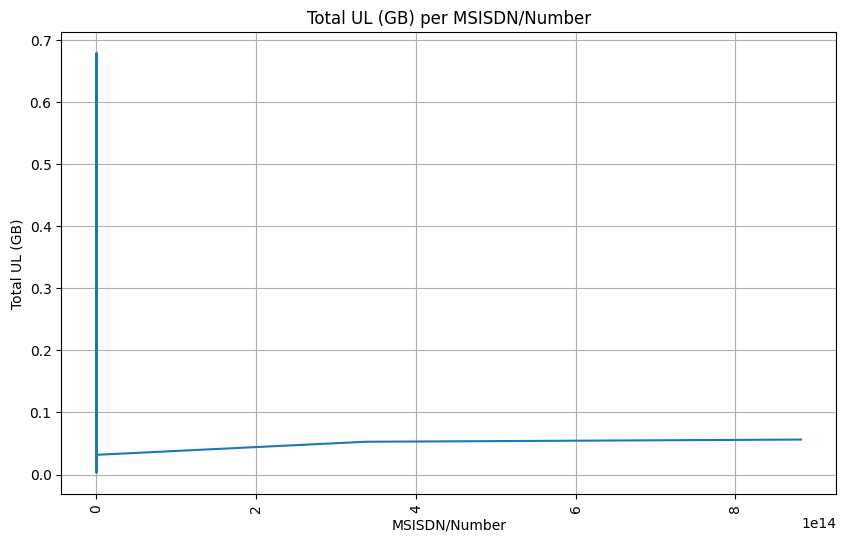

In [11]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total UL (Bytes)": "sum"})
aggregated_data['Total UL (GB)'] = aggregated_data['Total UL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total UL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total UL (GB)')
plt.title('Total UL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

User Engagement Task 3

In [12]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/27/2019 8:38,165.0,4/29/2019 6:05,365.0,163609.0,2.082019e+14,3.366698e+10,3.534681e+13,D79778B,...,14987796.0,9056232.0,11879031.0,8247208.0,646678453.0,5294081.0,29320108.0,7867767.0,31649432.0,681136616.0
1,1.311448e+19,4/27/2019 8:38,184.0,4/29/2019 7:51,42.0,169956.0,2.082014e+14,3.366162e+10,3.588751e+13,D35261C,...,16348390.0,4716006.0,20879619.0,8670219.0,41805775.0,1733531.0,767159375.0,11877019.0,29307586.0,91044064.0
2,7.349883e+18,4/27/2019 8:38,443.0,4/29/2019 7:55,87.0,170187.0,2.082018e+14,3.366615e+10,3.518231e+13,D12017B,...,4371849.0,10485982.0,4242648.0,13132694.0,488443332.0,14964346.0,735107614.0,11559224.0,54204245.0,509736116.0
3,7.349883e+18,4/27/2019 8:38,63.0,4/29/2019 6:22,553.0,164647.0,2.082019e+14,3.365187e+10,3.515581e+13,T92850B,...,542034.0,2946621.0,8604505.0,2076726.0,295088361.0,9673956.0,577955398.0,7029664.0,25964041.0,317321966.0
4,1.311448e+19,4/27/2019 8:38,662.0,4/29/2019 8:43,450.0,173071.0,2.082099e+14,3.365034e+10,3.561461e+13,T42176B,...,5369265.0,5154582.0,9731597.0,12046172.0,312475530.0,9758044.0,752013569.0,10664634.0,40315466.0,343566590.0


TASK 3 USER ENGAGEMENT ANALYSIS

Engagement metrics dataframe

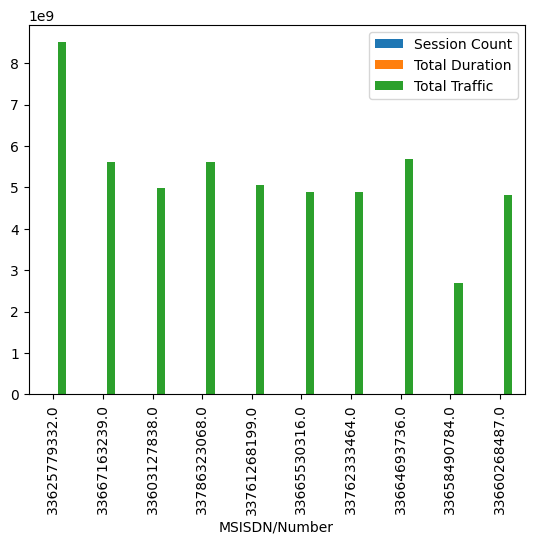

In [13]:
users_session = df.groupby("MSISDN/Number").agg({"Dur. (ms)": ["count","sum"],
                                                            "Total DL (Bytes)":"sum",
                                                            "Total UL (Bytes)":"sum"}).reset_index()
users_session.columns =  ['MSISDN/Number', 'Session Count', 'Total Duration', 'Total DL (Bytes)', 'Total UL (Bytes)'] 
users_session['Total Traffic'] = users_session['Total DL (Bytes)'] + users_session['Total UL (Bytes)']
users_session = users_session.sort_values("Session Count", ascending=False)[:10]
users_session = users_session.drop(columns=["Total DL (Bytes)","Total UL (Bytes)"])
users_session.plot(x='MSISDN/Number', y=['Session Count', 'Total Duration', 'Total Traffic'], kind='bar')
plt.show()

top 10 users by session Count

<Axes: xlabel='MSISDN/Number'>

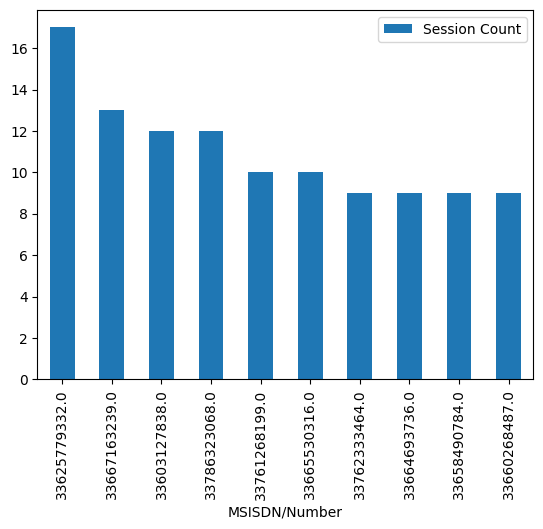

In [14]:
top_10_by_session_count = users_session.sort_values("Session Count", ascending=False)[:10]
top_10_by_session_count.plot(kind='bar', x="MSISDN/Number",y="Session Count")

top 10 users with Sessions duration


<Axes: xlabel='MSISDN/Number'>

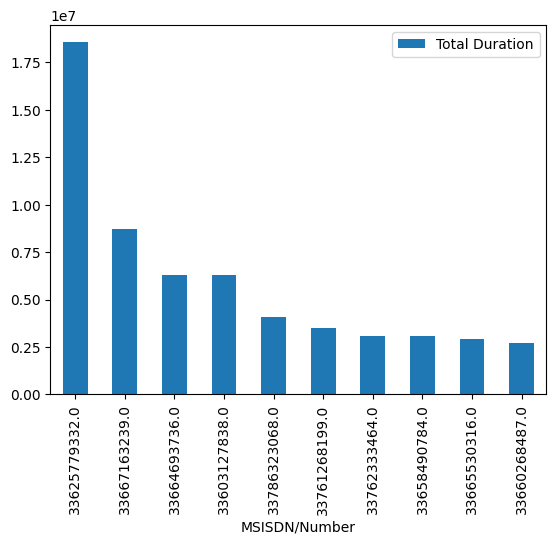

In [15]:
top_10_by_session_duration = users_session.sort_values("Total Duration", ascending=False)[:10]
top_10_by_session_duration.plot(kind='bar', x="MSISDN/Number",y="Total Duration")

Top 10 users by total traffic DL + UL

<Axes: xlabel='MSISDN/Number'>

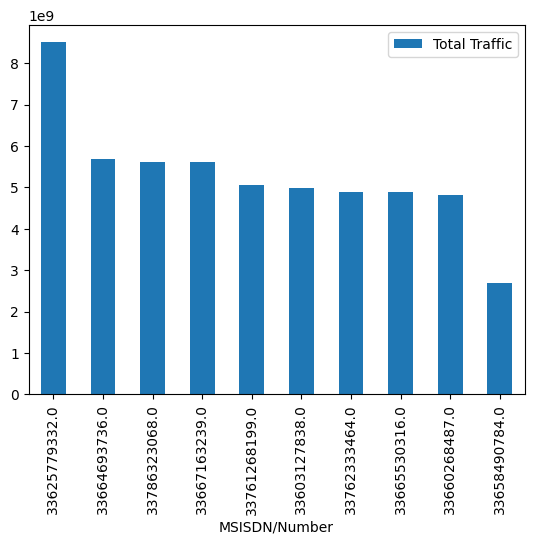

In [16]:
top_10_by_total_traffic = users_session.sort_values("Total Traffic", ascending=False)[:10]
top_10_by_total_traffic.plot(kind='bar', x="MSISDN/Number",y="Total Traffic")

Normalize

In [17]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ["Session Count","Total Duration","Total Traffic"]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(users_session[columns_to_normalize]), columns=columns_to_normalize, index=users_session.index)
df_normalized = pd.concat([df_normalized, users_session.drop(columns=columns_to_normalize)], axis=1)
df_normalized.head()

,Session Count,Total Duration,Total Traffic,MSISDN/Number
4572,1.000,1.000000,1.000000,3.362578e+10
24696,0.500,0.380459,0.504048,3.366716e+10
213,0.375,0.225261,0.393504,3.360313e+10
40458,0.375,0.084531,0.504708,3.378632e+10
35947,0.125,0.048022,0.406400,3.376127e+10


K-means

In [22]:
from sklearn.cluster import KMeans

engagement_metrics = df_normalized[['Session Count', 'Total Duration', 'Total Traffic']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(engagement_metrics)
df_normalized['Cluster'] = kmeans.labels_
plt.scatter(df_normalized['Session Count'], df_normalized['Total Duration'], c=df_normalized['Cluster'])
plt.xlabel('Session Count')
plt.ylabel('Total Duration')
plt.title('K-means Clustering of Engagement Metrics')
plt.colorbar(label='Cluster')
plt.show()

       Session Count  Total Duration  Total Traffic  MSISDN/Number  Cluster
35947          0.125        0.048022       0.406400   3.376127e+10        0
22759          0.125        0.014435       0.377438   3.366553e+10        0
37232          0.000        0.023140       0.379532   3.376233e+10        0
21477          0.000        0.225323       0.514997   3.366469e+10        0
11302          0.000        0.021503       0.000000   3.365849e+10        0
14523          0.000        0.000000       0.364717   3.366027e+10        0


d:\10academy\week 1\tellco1\tellco\myvenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
